In [1]:
import numpy as np
from numpy import exp
from math import pi
from scipy import special as sp
from src.mie import compute_fields, em
#
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def gen_plane(Lx,Lz,Nx=102,Nz=102,y=[0]):
    x = np.linspace(-Lx,Lx,Nx)
    z = np.linspace(-Lz,Lz,Nz)
    measure = (x[1]-x[0])*(z[1]-z[0])
    x,y,z = np.meshgrid(x,[0],z)
    _points=np.vstack([c.flatten() for c in (x,y,z)]).T
    shape = x.shape
    return _points,shape, measure 
#
def proj_per(E,R):
    r = R/em.vecmag_abs(R)[:,None]
    E = r*((E*r).sum(axis=-1)[:,None])
    return E

In [11]:
288/4.1

70.2439024390244

In [4]:
a=1
n=4.5+0.01j

R,shape,_ = gen_plane(2*a,2*a,Nz=100,Nx=100)
Rmag = em.vecmag_abs(R)
eps = ((Rmag > a).astype(float)  + (Rmag<=a)*n**2)

#_R = np.linspace(-2*a, 2*a, 100)
#R = np.vstack((_R,0*_R,0*_R)).T
E, EI = compute_fields(15,R,a,n,ncpu=1, ehatINC=[[1.,0.,0.]])
#
Eper = proj_per(E.T, R).T
Epar = E - Eper
Dper = eps * Eper


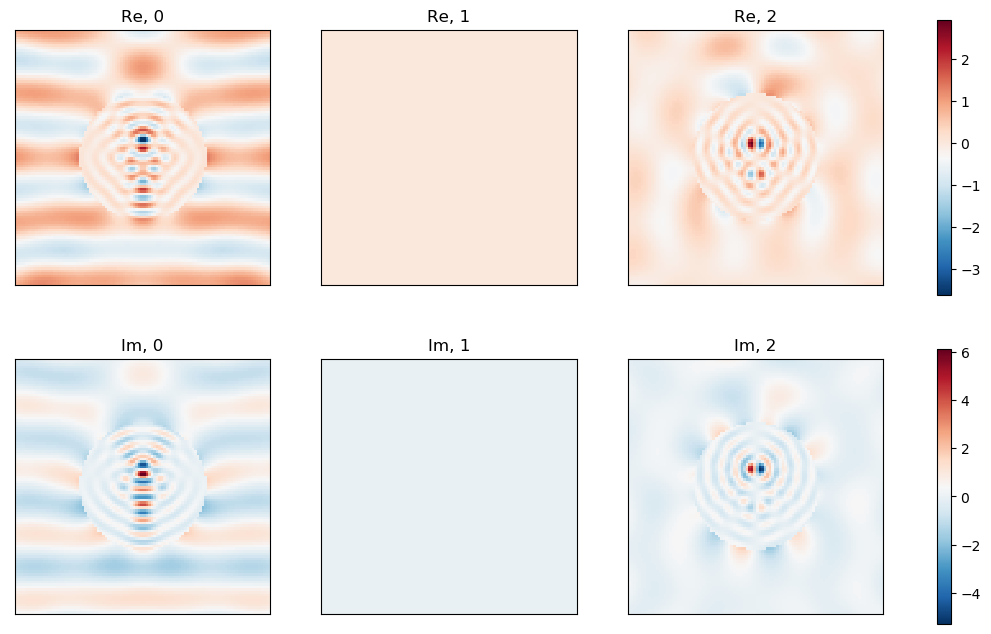

In [5]:
fig,axs = plt.subplots(ncols=3,nrows=2, figsize=(14,8),dpi=100)
cmap = 'RdBu_r'
vminr, vmini = np.min(E.real),np.min(E.imag)
vmaxr, vmaxi = np.max(E.real),np.max(E.imag)
for i in [0,1,2]:
    f = E[i].reshape(shape[1:])
    im0=axs[0][i].imshow(f.T.real,cmap=cmap,vmin=vminr,vmax=vmaxr)
    im1=axs[1][i].imshow(f.T.imag,cmap=cmap,vmin=vmini,vmax=vmaxi)
    
    #f = eps.reshape(shape[1:])
    #axs[0][i].imshow(np.abs(f),cmap='gray',alpha=0.1)
    #axs[1][i].imshow(np.abs(f),cmap='gray',alpha=0.1)
    
    axs[0][i].set_title('Re, {}'.format(i))
    axs[1][i].set_title('Im, {}'.format(i))
    axs[0][i].get_xaxis().set_visible(False)
    axs[0][i].get_yaxis().set_visible(False)
    axs[1][i].get_xaxis().set_visible(False)
    axs[1][i].get_yaxis().set_visible(False)
    
    #
fig.colorbar(im0,ax=axs[0])
fig.colorbar(im1,ax=axs[1])
#

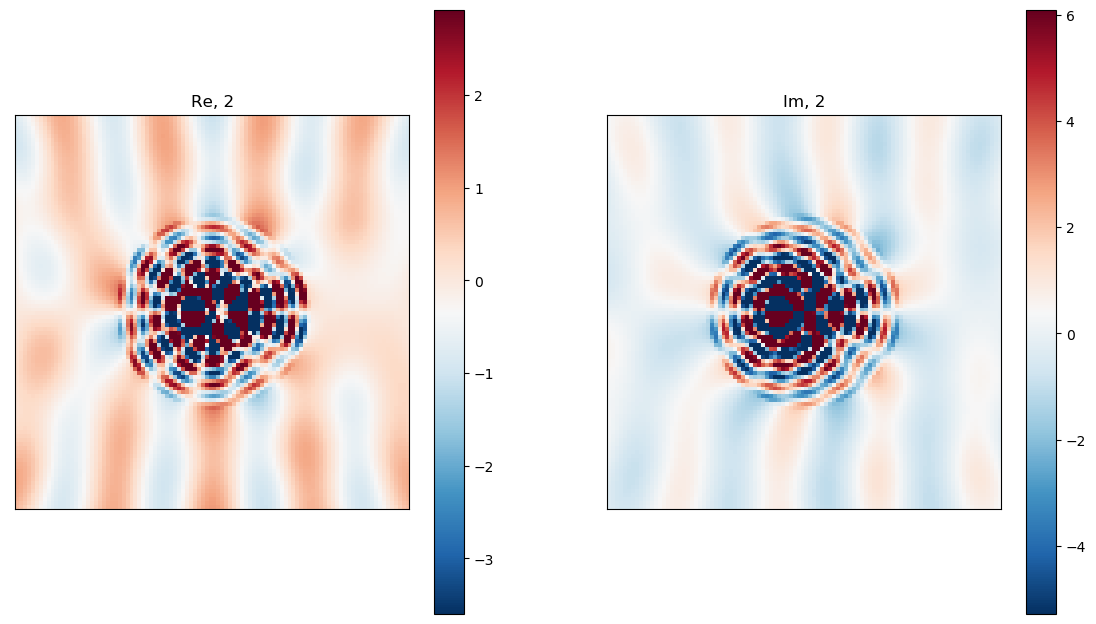

In [7]:
fig,axs = plt.subplots(ncols=2, figsize=(14,8),dpi=100)
cmap = 'RdBu_r'
vminr, vmini = np.min(E.real),np.min(E.imag)
vmaxr, vmaxi = np.max(E.real),np.max(E.imag)
rhat = R/em.vecmag_abs(R)[:,None]
if 1:
    f = (Dper.T * rhat).sum(axis=-1).reshape(shape[1:])
    #
    im0=axs[0].imshow(f.real,cmap=cmap,vmin=vminr,vmax=vmaxr)
    im1=axs[1].imshow(f.imag,cmap=cmap,vmin=vmini,vmax=vmaxi)
    #
    #axs[0][i].imshow(np.abs(eps),cmap='gray',alpha=0.1)
    #axs[1][i].imshow(np.abs(eps),cmap='gray',alpha=0.1)
    axs[0].set_title('Re, {}'.format(i))
    axs[1].set_title('Im, {}'.format(i))
    axs[0].get_xaxis().set_visible(False)
    axs[0].get_yaxis().set_visible(False)
    axs[1].get_xaxis().set_visible(False)
    axs[1].get_yaxis().set_visible(False)    
    #
fig.colorbar(im0,ax=axs[0])
fig.colorbar(im1,ax=axs[1])
#

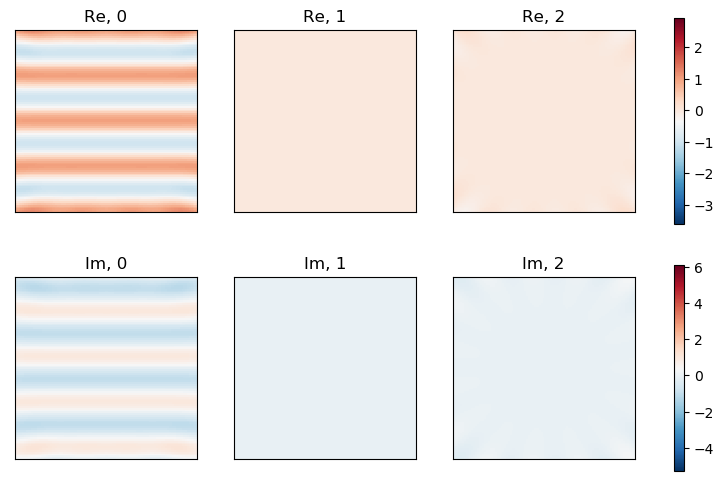

In [10]:
fig,axs = plt.subplots(ncols=3,nrows=2, figsize=(10,6),dpi=100)
cmap = 'RdBu_r'
vminr, vmini = np.min(E.real),np.min(E.imag)
vmaxr, vmaxi = np.max(E.real),np.max(E.imag)
for i in [0,1,2]:
    f = EI[i].reshape(shape[1:])
    im0=axs[0][i].imshow(f.T.real,cmap=cmap,vmin=vminr,vmax=vmaxr)
    im1=axs[1][i].imshow(f.T.imag,cmap=cmap,vmin=vmini,vmax=vmaxi)
    axs[0][i].set_title('Re, {}'.format(i))
    axs[1][i].set_title('Im, {}'.format(i))
    axs[0][i].get_xaxis().set_visible(False)
    axs[0][i].get_yaxis().set_visible(False)
    axs[1][i].get_xaxis().set_visible(False)
    axs[1][i].get_yaxis().set_visible(False)
    #
fig.colorbar(im0,ax=axs[0])
fig.colorbar(im1,ax=axs[1])
#